## RMS PROB

In [1]:
import math
import d2l 
from mxnet import *
from mxnet.gluon import nn
npx.set_np()


Text(0.5, 0, 'time')

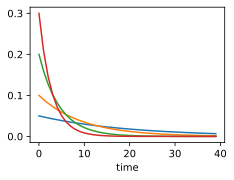

In [2]:
d2l.set_figsize((3.5, 2.5))

gammas = [0.95, 0.9, 0.8, 0.7]

for gamma in gammas:
    x = np.arange(40).asnumpy()
    d2l.plt.plot(x, (1-gamma) * gamma ** x, label= 'gamma = %.2f' % gamma)

d2l.plt.xlabel('time')

In [5]:
def rmsprop_2d(x1, x2, s1, s2):
    g1, g2, eps = 0.2 * x1, 4 * x2, 1e-6
    s1 = gamma * s1 + (1-gamma) * g1 ** 2
    s2 = gamma * s2 + (1-gamma) * g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2



epoch 1, x1 -3.735095, x2 -0.735089
epoch 2, x1 -2.952557, x2 -0.278126
epoch 3, x1 -2.372981, x2 -0.097741
epoch 4, x1 -1.915252, x2 -0.031013
epoch 5, x1 -1.543071, x2 -0.008699
epoch 6, x1 -1.236422, x2 -0.002101
epoch 7, x1 -0.982686, x2 -0.000421
epoch 8, x1 -0.773052, x2 -0.000066
epoch 9, x1 -0.600837, x2 -0.000007
epoch 10, x1 -0.460616, x2 -0.000000
epoch 11, x1 -0.347757, x2 -0.000000
epoch 12, x1 -0.258167, x2 0.000000
epoch 13, x1 -0.188167, x2 -0.000000
epoch 14, x1 -0.134436, x2 0.000000
epoch 15, x1 -0.093992, x2 -0.000000
epoch 16, x1 -0.064194, x2 0.000000
epoch 17, x1 -0.042745, x2 -0.000000
epoch 18, x1 -0.027691, x2 0.000000
epoch 19, x1 -0.017412, x2 -0.000000
epoch 20, x1 -0.010599, x2 0.000000


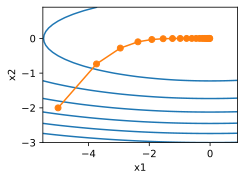

In [6]:
eta, gamma = 0.4, 0.9
d2l.show_trace_2d(f_2d, d2l.train_2d(rmsprop_2d))

In [7]:
def init_rmsprop_states(feature_dim):
    s_w = np.zeros((feature_dim, 1))
    s_b = np.zeros(1)
    return (s_w, s_b)

def rmsprop(params, states, hyperparams):
    gamma, eps = hyperparams['gamma'], 1e-6
    for p, s in zip(params, states):
        s[:] = gamma * s + (1-gamma) * np.square(p.grad)
        p[:] -= hyperparams['lr'] * p.grad / np.sqrt(s + eps) 

loss: 0.243, 0.070 sec/epoch


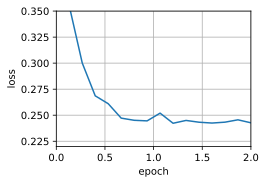

In [8]:
data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
d2l.train_ch11(rmsprop, init_rmsprop_states(feature_dim),
              {'lr': 0.01, 'gamma': 0.9}, data_iter, feature_dim);

loss: 0.248, 0.042 sec/epoch


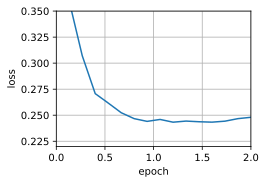

In [10]:
d2l.train_gluon_ch11('rmsprop', {'learning_rate': 0.01, 'gamma1': 0.9},
                    data_iter)